## Introduction

In this Guided Project, we'll:

* explore why image classification is a hard task
* observe the limitations of traditional machine learning models for image classification
* train, test, and improve a few different deep neural networks for image classification

**Why is image classifcation a hard task?**

* First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.


* Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.


* Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

**Why is deep learning effective in image classification?**

Deep learning is effective in image classification because of the models' ability to learn `hierarchical representations`. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification and unfortunately out of scope for this course, which was trained to identify faces.

![Jupyter](./nn_learns_hierarchy.png)

You'll notice in the first hidden layer the network learned to represent `edges and specific features of faces`. In the second hidden layer, the weights seemed to represent higher level facial features like `eyes and noses`. Finally, the weights in the last hidden layer `resemble faces` that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

## Working With Image Data

In [72]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
digits_images = load_digits()

digits_images.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [30]:
images = pd.DataFrame(digits_images['data'])
labels = digits_images['target']

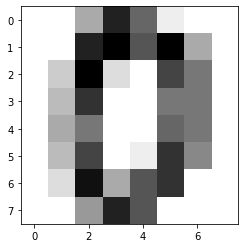

In [36]:
plt.imshow(images.iloc[0,:].values.reshape(8,8), cmap='gray_r')

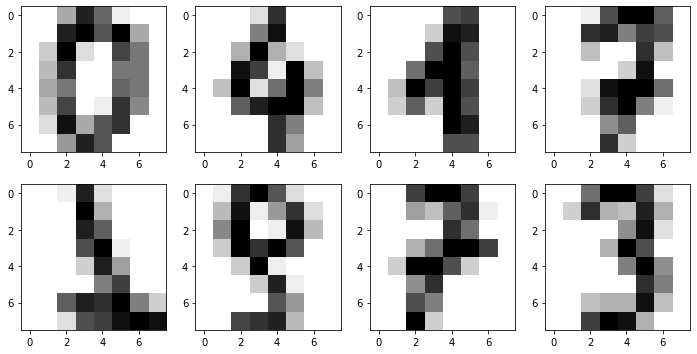

In [41]:
image_index = [0, 100, 200, 300, 1000, 1100, 1200, 1300]

fig = plt.figure(figsize=(12,6))
row = 2
col = 4
for i in range(row*col):
    ax = fig.add_subplot(row, col, i+1)
    image = images.iloc[image_index[i],:].values.reshape(8,8)
    ax.imshow(image, cmap='gray_r')

## K-Nearest Neighbors Model

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [81]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [82]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

preds = knn.predict(X_test)

accuracy_score(y_test, preds)

0.9888888888888889

In [83]:
confusion_matrix(y_test, preds)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0, 38]], dtype=int64)

In [86]:
pd.Series(labels).value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64

### using grid search with cross-validation

In [103]:
tuned_parameters = {'n_neighbors': [i for i in range(1, 16)]}

In [109]:
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=4)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Best parameters set found on development set:
{'n_neighbors': 3}

0.987 (+/-0.014) for {'n_neighbors': 1}
0.985 (+/-0.021) for {'n_neighbors': 2}
0.987 (+/-0.011) for {'n_neighbors': 3}
0.983 (+/-0.012) for {'n_neighbors': 4}
0.987 (+/-0.014) for {'n_neighbors': 5}
0.985 (+/-0.016) for {'n_neighbors': 6}
0.984 (+/-0.015) for {'n_neighbors': 7}
0.981 (+/-0.011) for {'n_neighbors': 8}
0.981 (+/-0.013) for {'n_neighbors': 9}
0.978 (+/-0.016) for {'n_neighbors': 10}
0.977 (+/-0.014) for {'n_neighbors': 11}
0.976 (+/-0.011) for {'n_neighbors': 12}
0.976 (+/-0.012) for {'n_neighbors': 13}
0.975 (+/-0.010) for {'n_neighbors': 14}
0.976 (+/-0.011) for {'n_neighbors': 15}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        30
           3       0.97      1.00      0.99        34
           4       0.97      1.00      0.99        36
  

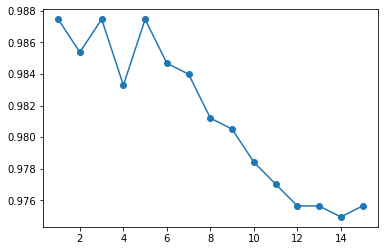

In [108]:
plt.plot(range(1,16), means, marker='o');

## Neural Network With One Hidden Layer

In [113]:
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

tuned_parameters = {'hidden_layer_sizes': [(2**i,) for i in range(3, 9)]}

clf = GridSearchCV(MLPClassifier(max_iter=500), tuned_parameters, cv=4)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochasti

Best parameters set found on development set:
{'hidden_layer_sizes': (128,)}

0.922 (+/-0.033) for {'hidden_layer_sizes': (8,)}
0.944 (+/-0.017) for {'hidden_layer_sizes': (16,)}
0.952 (+/-0.020) for {'hidden_layer_sizes': (32,)}
0.959 (+/-0.036) for {'hidden_layer_sizes': (64,)}
0.973 (+/-0.019) for {'hidden_layer_sizes': (128,)}
0.971 (+/-0.019) for {'hidden_layer_sizes': (256,)}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        52
           3       0.96      0.98      0.97        56
           4       1.00      1.00      1.00        54
           5       0.98      0.96      0.97        56
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        56
           8       0.97      0.98      0.98        60
           9       0.96      0.94      0.95        51

    accuracy      

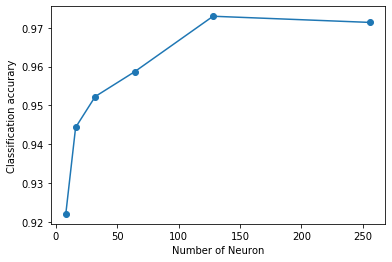

In [115]:
plt.plot([2**i for i in range(3, 9)], means, marker='o')
plt.xlabel('Number of Neuron')
plt.ylabel('Classification accurary')
plt.show()

In [118]:
clf.best_estimator_.coefs_

[array([[ 8.55613714e-07,  2.02173099e-05,  1.70330855e-05, ...,
         -1.38124035e-13, -6.28526097e-05, -2.28570451e-04],
        [-1.65174947e-01,  8.01643349e-06,  2.28199443e-01, ...,
         -8.90754178e-02, -2.92642143e-02,  1.75464090e-01],
        [-1.92212734e-01, -1.76622648e-01,  1.69594751e-02, ...,
          1.17655569e-01,  1.24930284e-01,  1.44189731e-01],
        ...,
        [ 1.46032444e-01, -1.18243962e-01,  1.27872919e-01, ...,
         -1.23889384e-01, -3.84774830e-02,  7.71219033e-02],
        [ 4.36365426e-02,  5.67508368e-02,  2.93307888e-02, ...,
         -2.01944458e-01,  1.71296380e-02, -9.38501157e-02],
        [ 1.45301671e-01, -1.20890118e-01,  1.25151168e-01, ...,
          3.87643975e-02,  6.23263328e-02, -5.50190985e-02]]),
 array([[ 0.02699421,  0.31661531,  0.09545308, ..., -0.30586056,
         -0.31284797, -0.10498655],
        [-0.07879982,  0.14839632, -0.01265353, ...,  0.12459036,
          0.06530689, -0.02693427],
        [ 0.12442848,  0.

## Neural Network With Two Hidden Layers

In [128]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(64, 64))
clf.fit(X_train, y_train)

print(accuracy_score(y_test, clf.predict(X_test)))
print(accuracy_score(y_train, clf.predict(X_train)))

0.9777777777777777
1.0


In [129]:
from sklearn.model_selection import cross_val_score

clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(64, 64))

scores = cross_val_score(clf, images, labels, n_jobs=4, cv=4)

scores

array([0.94722222, 0.91666667, 0.95264624, 0.96100279, 0.91364903])

## Neural Network With Three Hidden Layers

In [132]:
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(10, 10, 10))

scores = cross_val_score(clf, images, labels, n_jobs=4, cv=6)

scores

array([0.86333333, 0.93      , 0.93      , 0.87959866, 0.89297659,
       0.88294314])

In [133]:
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(64, 64, 64))

scores = cross_val_score(clf, images, labels, n_jobs=2, cv=6)

scores

array([0.94333333, 0.95666667, 0.97333333, 0.95986622, 0.97324415,
       0.90635452])

In [134]:
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(128, 128, 128))

scores = cross_val_score(clf, images, labels, n_jobs=2, cv=6)

scores

array([0.95333333, 0.96666667, 0.96333333, 0.9632107 , 0.97993311,
       0.91304348])

## Next Steps

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Training set score: 0.986800
Test set score: 0.970000


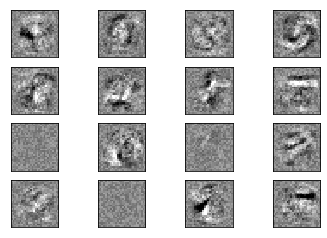

In [135]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()